# IS709 Assignment 4

### Due: January 22, Sunday-23.59

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_4.ipynb (e.g., “e123456_HW_4.ipynb”).
- Late submissions will be accepted by January 25, 2021, 23:59 with a 5% per day penalty.
- **This is an individual assignment. You have to adhere to the academic integrity principles.**
- You are supposed to be able to interpret your findings. Hence, you shouldn't just find a number or result and just leave it. You need to comment on your findings by giving as much as **necessary** details.    

# Questions
## Q1.
For the following use data in file q1_data.csv that consists of 40 feature columns (x1 .. x40) and target variable y.

**a (20 pts).** 

    Randomly take samples of size 100, 150, 200, ...., 950, 1000 (i.e., incrementing sample sizes by 50) from the given dataset, apply train-test split (%70 train-%30 test), fit a multiple linear regression model, evaluate the mean square performance of the model on the train and test sets and plot results. Discuss the results.    

    Are the performances on the train and test sets similar for different sample sizes? If not, why are the performances on the train set better/worse than the performance on the test set for small and large sample sizes? If you had more examples in the dataset would the performance improve? 
   
    Does regularization improve the performance of the test set? Briefly explain your reasoning.       
  

**b (20 pts).**
    
    Repeat part (a) after applying polynomial expansion with degree=2 and set to the given dataset.(Do not include bias i.e., set parameter include_bias=False)

**c (20 pts).**

    Use Lasso regularization and try to fit the best possible model to the given dataset. When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits. Report the model performance on the train/validation/test sets. 
    
    What is the regression equation for the best model (consider only the significant coefficients - compared to the largest coefficients)

In [126]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline
import math

q1_data=pd.read_csv("q1_data.csv")

In [94]:
def q1_compare_RMSE(q1_data,model=LinearRegression(), test_ratio=0.3):
    student_id = 2532810
    names = []
    overall_train= 0
    overall_test= 0
    rmses_train = []
    rmses_test = []
    R2=[]
    arraySize=100
    while arraySize<1050:
        globals()[f"data_{arraySize}"] = q1_data.sample(n=arraySize, random_state=student_id)
        globals()[f"data_{arraySize}"].name=f"data_{arraySize}"
        x=globals()[f"data_{arraySize}"].drop("y", axis=1)
        y=globals()[f"data_{arraySize}"]["y"]
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_ratio, random_state=student_id)
        model.fit(x_train, y_train) ## regression model is fitted
        #print('intercept=', model.intercept_, 'coefficients=', model.coef_) ##since there are three predictors, .coef_ returns three values in an array
        predictions_train=model.predict(x_train)
        err_train = mean_squared_error(y_train, predictions_train)
        predictions_test=model.predict(x_test)
        err_test = mean_squared_error(y_test, predictions_test)


        rmse_train = math.sqrt(err_train)
        overall_train = overall_train + rmse_train
        rmse_test = math.sqrt(err_test)
        overall_test = overall_test + rmse_test
        R2_array=model.score(x_train,y_train)

        #print(globals()[f"data_{arraySize}"].name, ' train set RMSE:',rmse_train)
        #print(globals()[f"data_{arraySize}"].name, ' test set RMSE:',rmse_test)
        #print(globals()[f"data_{arraySize}"].name, ' R2:',R2_array,'\n')
        names.append(globals()[f"data_{arraySize}"].name)
        rmses_train.append(rmse_train)
        rmses_test.append(rmse_test)
        R2.append(R2_array)
      
        arraySize+=50
    return (names,rmses_train,rmses_test,R2)

In [95]:
def q1_plot_RMSE(names,rmses_train,rmses_test,R2):
    least_RMSE_train = min(rmses_train)
    least_RMSE_train_name = names[rmses_train.index(least_RMSE_train)]

    #print("The least train set RMSE value  :", least_RMSE_train,"\n The least RMSE dataset:", least_RMSE_train_name, "\n The index of dataset:",rmses_train.index(least_RMSE_train))

    most_RMSE_train = max(rmses_train)
    most_RMSE_train_name = names[rmses_train.index(most_RMSE_train)]

    #print("The most train set RMSE value  :", most_RMSE_train,"\n The most RMSE dataset:", most_RMSE_train_name)

    least_RMSE_test = min(rmses_test)
    least_RMSE_test_name = names[rmses_test.index(least_RMSE_test)]

    #print("The least test set RMSE value  :", least_RMSE_test,"\n The least RMSE dataset:", least_RMSE_test_name, "\n The index of dataset:",rmses_test.index(least_RMSE_test))

    most_RMSE_test = max(rmses_test)
    most_RMSE_test_name = names[rmses_test.index(most_RMSE_test)]

    #print("The most test set RMSE value  :", most_RMSE_test,"\n The most RMSE dataset:", most_RMSE_test_name)

    columns=['rmses_train','rmses_test','R2']
    results=[]
    
    variables = range(len(names))
    for i in variables:
        results.append((rmses_train[i], rmses_test[i], R2[i]))
    
    res = pd.DataFrame(results, index=names, columns=columns)
    display(res)
    res.plot()
    plt.ylim((min(least_RMSE_train,least_RMSE_test,min(R2))-1),(max(most_RMSE_train,most_RMSE_test,max(R2))+1))
    plt.figsize=(20, 20)
    #plt.xticks(names)
    plt.grid()

    
    #f, axes = plt.subplots(2,1, figsize=(20, 20))
    #axes[0].plot(names, rmses_train, 'o-', label='Train Set RMSEs') 
    #axes[1].plot(names, rmses_test, 'o-', label='Test Set RMSEs') 


### a (20 pts) 
Are the performances on the train and test sets similar for different sample sizes? If not, why are the performances on the train set better/worse than the performance on the test set for small and large sample sizes? If you had more examples in the dataset would the performance improve? 
   
    Does regularization improve the performance of the test set? Briefly explain your reasoning.
    
### Answer

We can see from the graph rmses_train (Train Set Error) is increasing by the increase in training set size, on the other hand rmses_test (Test Set Error) is decreasing by the increase in test set size. But at one point they start to perform nearly similar.

R2 which tells us how much variance is explained by the model compared to how much variance there is to explain in the first place ( proportion of variance in the outcome variable that is shared by the predictor variabl) is very high and nearly constant against to set size.


First of all we need to recall some terms from lecture notes:
##### Bias-Variance
**Bias**: the difference between the average prediction of our model and the correct value which we are trying to predict.
High bias means the model does not fit to the training data well. That is, the model is an oversimplification. High bias causes high error on training and test data.
**To fix high bias (underfit), you can**
- get additional features
- add polynomial features

**Variance**: Variability of the model prediction for a given data point. High variance means the model overfits the training data and it does not generalize. High variance causes a small error on training data but a large error on test data.
**To fix high variance (overfit), you can**
- get more training example
- try a smaller set of features

**Adding more data** (considering only rows) will not solve bias problem but can solve variance problem. On the other hand, instead of adding more data we can consider adding more features to solve bias problem. Meantime by adding more features we are adding more data.

**Regularization** is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. Regularization, significantly reduces the variance of the model, without substantial increase in its bias. If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. So we can conclude that regularization improve the performance of the test set.
But we must not forget that, for any fixed dataset, taking sufficiently strong regularization will make the linear model essentially constant, presumably not the best model. 
There's a bias-variance tradeoff: increasing regularization weakens the model's ability to learn the training data, which to a point will tend to prevent overfitting and improve test performance.

,rmses_train,rmses_test,R2
data_100,1.426620,4.290559,0.995035
data_150,1.815064,3.011346,0.992661
data_200,2.181886,2.740987,0.989537
data_250,2.195522,3.008817,0.989722
data_300,2.225780,3.057531,0.989938
data_350,2.328125,2.659287,0.989132
data_400,2.342475,2.714704,0.988949
data_450,2.409858,2.785569,0.987832
data_500,2.514045,2.599215,0.986198
data_550,2.560283,2.568923,0.986576


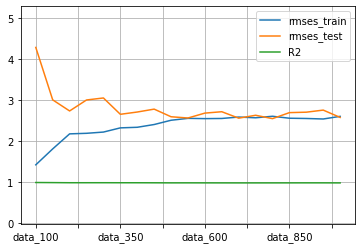

In [96]:
q1_data=pd.read_csv("q1_data.csv")

model = LinearRegression()

names,rmses_train,rmses_test,R2 = q1_compare_RMSE(q1_data,model)
q1_plot_RMSE(names,rmses_train,rmses_test,R2)

### b (20 pts) 

    Repeat part (a) after applying polynomial expansion with degree=2 and set to the given dataset.(Do not include bias i.e., set parameter include_bias=False)


We can see from the graph rmses_train (Train Set Error) is nearly constant on different training set size, on the other hand rmses_test (Test Set Error) is decreasing by the increase in test set size. But they do ot perform similar for our sample sizes. 
R2 is very high and constant against to set size.

,rmses_train,rmses_test,R2
data_100,4.867680e-14,19.516845,1.0
data_150,7.299504e-14,16.413674,1.0
data_200,6.397601e-14,15.330730,1.0
data_250,6.638561e-14,16.948453,1.0
data_300,6.570031e-14,13.164103,1.0
data_350,7.600682e-14,12.267090,1.0
data_400,7.312986e-14,11.235156,1.0
data_450,7.478335e-14,11.500781,1.0
data_500,6.966378e-14,11.126507,1.0
data_550,8.447860e-14,8.540843,1.0


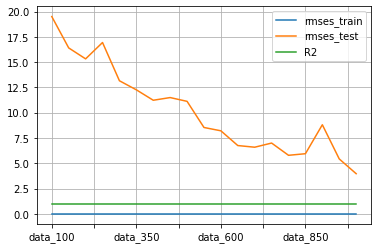

In [97]:
poly = PolynomialFeatures(2, include_bias=False) ### Generate polynomial and interaction features
poly_features = poly.fit_transform(q1_data.drop("y", axis=1))
q1_data_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names())
q1_data_poly["y"] = q1_data["y"]


model = LinearRegression()

names,rmses_train,rmses_test,R2 = q1_compare_RMSE(q1_data_poly,model)
q1_plot_RMSE(names,rmses_train,rmses_test,R2)


In [98]:
def q1_c_compare_RMSE(q1_data,model=LinearRegression(), test_ratio=0.3):
    student_id = 2532810
    names = []
    overall_train= 0
    overall_test= 0
    rmses_train = []
    rmses_test = []
    intercepts = []
    coefficients = []
    R2=[]
    arraySize=100
    while arraySize<1050:
        globals()[f"data_{arraySize}"] = q1_data.sample(n=arraySize, random_state=student_id)
        globals()[f"data_{arraySize}"].name=f"data_{arraySize}"
        x=globals()[f"data_{arraySize}"].drop("y", axis=1)
        y=globals()[f"data_{arraySize}"]["y"]
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=test_ratio, random_state=student_id)
        model.fit(x_train, y_train) ## regression model is fitted
        print('intercept=', model.intercept_, 'coefficients=', model.coef_) ##since there are three predictors, .coef_ returns three values in an array
        intercepts.append(model.intercept_)
        coefficients.append(model.coef_)
        
        predictions_train=model.predict(x_train)
        err_train = mean_squared_error(y_train, predictions_train)
        predictions_test=model.predict(x_test)
        err_test = mean_squared_error(y_test, predictions_test)

        rmse_train = math.sqrt(err_train)
        overall_train = overall_train + rmse_train
        rmse_test = math.sqrt(err_test)
        overall_test = overall_test + rmse_test
        R2_array=model.score(x_train,y_train)

        #print(globals()[f"data_{arraySize}"].name, ' train set RMSE:',rmse_train)
        #print(globals()[f"data_{arraySize}"].name, ' test set RMSE:',rmse_test)
        #print(globals()[f"data_{arraySize}"].name, ' R2:',R2_array,'\n')
        names.append(globals()[f"data_{arraySize}"].name)
        rmses_train.append(rmse_train)
        rmses_test.append(rmse_test)
        R2.append(R2_array)
      
        arraySize+=50
    return (names,rmses_train,rmses_test,R2,intercepts,coefficients)

In [99]:
def q1_c_plot_RMSE(names,rmses_train,rmses_test,R2):
    least_RMSE_train = min(rmses_train)
    least_RMSE_train_name = names[rmses_train.index(least_RMSE_train)]

    #print("The least train set RMSE value  :", least_RMSE_train,"\n The least RMSE dataset:", least_RMSE_train_name, "\n The index of dataset:",rmses_train.index(least_RMSE_train))

    most_RMSE_train = max(rmses_train)
    most_RMSE_train_name = names[rmses_train.index(most_RMSE_train)]

    #print("The most train set RMSE value  :", most_RMSE_train,"\n The most RMSE dataset:", most_RMSE_train_name)

    least_RMSE_test = min(rmses_test)
    least_RMSE_test_name = names[rmses_test.index(least_RMSE_test)]

    #print("The least test set RMSE value  :", least_RMSE_test,"\n The least RMSE dataset:", least_RMSE_test_name, "\n The index of dataset:",rmses_test.index(least_RMSE_test))

    most_RMSE_test = max(rmses_test)
    most_RMSE_test_name = names[rmses_test.index(most_RMSE_test)]

    #print("The most test set RMSE value  :", most_RMSE_test,"\n The most RMSE dataset:", most_RMSE_test_name)

    columns=['rmses_train','rmses_test','R2']
    results=[]
    
    variables = range(len(names))
    for i in variables:
        results.append((rmses_train[i], rmses_test[i], R2[i]))
    
    res = pd.DataFrame(results, index=names, columns=columns)
    display(res)
    res.plot()
    plt.ylim((min(least_RMSE_train,least_RMSE_test,min(R2))-1),(max(most_RMSE_train,most_RMSE_test,max(R2))+1))
    plt.figsize=(20, 20)
    #plt.xticks(names)
    plt.grid()
    return rmses_test.index(least_RMSE_test)
    
    #f, axes = plt.subplots(2,1, figsize=(20, 20))
    #axes[0].plot(names, rmses_train, 'o-', label='Train Set RMSEs') 
    #axes[1].plot(names, rmses_test, 'o-', label='Test Set RMSEs') 


### c (20 pts) 

    Use Lasso regularization and try to fit the best possible model to the given dataset. When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits. Report the model performance on the train/validation/test sets. 
    
    What is the regression equation for the best model (consider only the significant coefficients - compared to the largest coefficients)

intercept= -0.025209034113742257 coefficients= [ -1.99852208  10.56708578   0.34280319 -19.46373829   0.20123021
  -0.6487325   15.5928272    0.83057923   0.68691186   1.05647378
  -0.35712247  -0.25092681 -25.0425635    0.68729005   0.07447374
   0.49719831   0.20202832  -0.79593345  -0.12891115  -0.
   0.47933336  -1.04805452   0.08181139   0.8356541    0.58895339
  -0.93986501   0.64019976  -0.          -0.24379556   0.04244007
  -0.          -0.14421589   1.20372316  -0.23921362  -0.35993343
  -0.76480117  -0.30845251   0.85024186  -1.60844612   0.11173791]
intercept= 0.3344887257487909 coefficients= [-1.21048842e+00  1.00529329e+01  9.32118448e-02 -2.00731285e+01
 -1.16513101e-01 -7.00355358e-01  1.55957745e+01  1.11922322e+00
  3.80501167e-01  3.15188161e-01 -1.19001302e-02 -3.06690048e-01
 -2.50571773e+01 -2.04678259e-01  0.00000000e+00 -3.36268327e-01
 -6.32658588e-01  0.00000000e+00 -6.63935617e-02 -3.24843266e-01
  3.03005914e-01 -5.91563991e-01  2.57451506e-01 -1.44229095e-0

,rmses_train,rmses_test,R2
data_100,1.443899,3.833169,0.994914
data_150,1.821530,2.971520,0.992609
data_200,2.185832,2.686198,0.989499
data_250,2.200278,2.971428,0.989677
data_300,2.229557,2.993890,0.989904
data_350,2.331029,2.614199,0.989105
data_400,2.344868,2.690068,0.988926
data_450,2.412296,2.759733,0.987808
data_500,2.516665,2.566364,0.986169
data_550,2.563194,2.534760,0.986546


-0.02873143443462134
+  -0.33892773723638 * X0
+  10.397888105692777 * X1
+  -0.0 * X2
+  -20.018300636265867 * X3
+  0.15078282427754805 * X4
+  -0.24084219639080937 * X5
+  15.142623118157553 * X6
+  0.358846413291785 * X7
+  -0.0053510669401581334 * X8
+  -0.0744016250663531 * X9
+  0.05183589281730809 * X10
+  0.043567028770406684 * X11
+  -24.938530739437162 * X12
+  0.2410295713030524 * X13
+  0.09105469714735046 * X14
+  0.11772311856770253 * X15
+  -0.1104455130426506 * X16
+  -0.1984997926007063 * X17
+  -0.0711134513480476 * X18
+  -0.09976031037534597 * X19
+  0.28161235743360635 * X20
+  -0.3233263101167149 * X21
+  -0.03437085892405313 * X22
+  0.012695922953665869 * X23
+  0.28872783162458443 * X24
+  0.3416106201610987 * X25
+  -0.10837659076622282 * X26
+  -0.0723021115885287 * X27
+  0.07155175124979446 * X28
+  -0.21025840325667036 * X29
+  0.2502235684110799 * X30
+  0.28866450604385663 * X31
+  0.036627717470929785 * X32
+  0.09290063331072011 * X33
+  0.02916668622

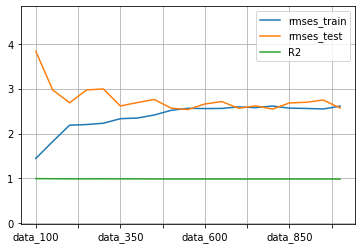

In [100]:
q1_data=pd.read_csv("q1_data.csv")
model = linear_model.Lasso(alpha=0.01,max_iter=10000) 

names,rmses_train,rmses_test,R2,intercepts,coefficients = q1_c_compare_RMSE(q1_data,model)
index= q1_c_plot_RMSE(names,rmses_train,rmses_test,R2)

coefficient_length= range(len(coefficients[index]))
print(intercepts[9],)
for i in coefficient_length:
        print('+ ',coefficients[index][i],'*',f"X{i}")

intercept= 0.06348440770474106 coefficients= [ -1.73131283  10.12226528   0.50504321 -19.90874129   0.03659791
  -0.29296944  15.681297     1.05275634   0.31139441   0.75268514
   0.28903543   0.43497495 -25.68007332   0.56871152   0.48831357
   0.26671225   0.04105158  -0.92169186  -0.41519406   0.0905594
   0.5524444   -0.95535051  -0.22359251   0.50861802   0.0754481
  -0.91537219   0.6978905    0.71726915  -0.71189647   0.12255698
  -0.14414019  -0.           0.6325181    0.12118713  -0.27011147
  -0.6680091   -0.20391148   0.13535541  -1.47428362  -0.51991863]
intercept= 0.2170423256864495 coefficients= [ -1.31944205  10.27703575   0.22400922 -20.23785351  -0.08689862
  -0.58538538  15.75858756   1.112332     0.09285898   0.55692129
   0.43428569  -0.40917629 -25.50350738   0.08957089   0.15762821
  -0.20339928   0.25253644  -0.          -0.20286963  -0.29379055
   0.49825295  -0.52653372   0.04466793  -0.25299377  -0.26213581
  -0.59644716   0.34859321   0.94028174  -0.26409071  

,rmses_train,rmses_test,R2
data_100,1.646400,4.528095,0.994265
data_150,2.061995,2.286290,0.990312
data_200,2.188003,2.515446,0.989402
data_250,2.278590,3.241498,0.989068
data_300,2.317164,3.038299,0.989325
data_350,2.357420,2.627973,0.988573
data_400,2.391175,2.762583,0.988084
data_450,2.458150,2.852479,0.987888
data_500,2.502663,2.498159,0.987415
data_550,2.553449,2.230762,0.986671


f(x)=  0.06392731853367017
+ -0.46636441049460886 * X0
+ 10.322691526625897 * X1
+ 0.1108987960213512 * X2
+ -19.850458720932185 * X3
+ 0.22094009230685951 * X4
+ -0.15169288766219538 * X5
+ 14.959562368587228 * X6
+ 0.2712250430494371 * X7
+ 0.0 * X8
+ -0.0 * X9
+ 0.21343548412339597 * X10
+ 0.16200905992920286 * X11
+ -25.08228875627463 * X12
+ 0.1180899263885704 * X13
+ 0.18033064647920652 * X14
+ 0.13789822392086162 * X15
+ -0.15353774460685007 * X16
+ 0.0 * X17
+ -0.06696279770099502 * X18
+ 0.0 * X19
+ 0.1869774499427069 * X20
+ -0.37180006779864755 * X21
+ 0.07580313770495156 * X22
+ 0.12304064745973649 * X23
+ 0.18765653392241688 * X24
+ 0.0055979568937551015 * X25
+ 0.018879848783960908 * X26
+ 0.11951774748637625 * X27
+ 0.09752750538490133 * X28
+ -0.1347267103152522 * X29
+ 0.19455743876099357 * X30
+ 0.09594650358369856 * X31
+ -0.034040710374350046 * X32
+ 0.07332735413771002 * X33
+ 0.1059877312404241 * X34
+ -0.3586667787759165 * X35
+ 0.036321380212320876 * X36
+ 0.0 *

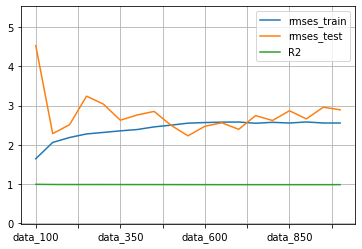

In [101]:
q1_data=pd.read_csv("q1_data.csv")
model = linear_model.Lasso(alpha=0.01,max_iter=10000) 
test_ratio=0.2

names,rmses_train,rmses_test,R2,intercepts,coefficients = q1_c_compare_RMSE(q1_data,model,test_ratio=0.1)
index= q1_c_plot_RMSE(names,rmses_train,rmses_test,R2)

coefficient_length= range(len(coefficients[index]))
print('f(x)= ',intercepts[9],)
for i in coefficient_length:
        print('+',coefficients[index][i],'*',f"X{i}")

# Q2

In the given q2 _data.csv, x is the only feature and y is the target variable.

**a (20 pts).** 

    Fit the best possible linear regression model to predict y in terms of x. You may apply polynomial expansion (try up to degree=15) but do not use regularization. If you find several models providing almost the same performance, choose the least complex model among them. When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits. Report the model performance on the train/validation/test sets. Give the regression equation for the best model as y = f(x)=c0 + c1*x + c2*x^2 + ... ck*x^k.

**b (20 pts).**
    
    Use the regression equation given in part (a) to find y value for x=1. Assume this is the correct value returned by the population function that is approximated by f(x) found in part (a). Then, apply the following procedure to fit several models with degree 1..0 by taking a sample of size 20 from the given dataset and predict y at x = 1:

    for d in range(1,11):
        add polynomial features up to degree d
        pred = []
        for i in range(1000):
            take a sample of size 20 rows from the dataset with added polynomial features
            fit a linear regression model (do not apply train/test split)
            predict the value of y at x = 1 
            append y to pred list
        find and print d, and the mean and the standard deviation of pred list (i.e., 1000 predictions for degree=d)
          
    Compare the mean prediction found with the value returned by the function found in part (a) and standard deviations of the predictions made for different degrees. Comment on the obtained results.   


In [102]:
## This function generates polynomial and interaction features and add the data then fits polynomial regression
def fit_poly(degree, data, model=LinearRegression(), test_size=0.3, plot=False):
    poly = PolynomialFeatures(degree=degree, include_bias=False)  
    pf = poly.fit_transform(data[['x']])  ## creates polynomial features with given degree
    X = pd.DataFrame(pf, columns=poly.get_feature_names())

    X_train, X_test, y_train, y_test = train_test_split(X,data['y'],test_size=test_size,random_state=2532810) ##split data as train and test
    model.fit(X_train, y_train)
    if plot:
        x_m = np.linspace(data.x.min(), data.x.max(), 1000)
        y_m = []
        for x_ in x_m:
            y_ = model.intercept_
            for j,c in enumerate(model.coef_):
                y_ += c * x_**(j+1)
            y_m.append(y_)
        plt.plot(x_m, y_m, color='black') ## shows model with black line
        plt.scatter(X_train.x0,y_train, c='blue') ## shows train data with blue dots
        plt.scatter(X_test.x0,y_test,c='red') ## shows test data with red dots

    train_error = metrics.mean_squared_error(y_train,model.predict(X_train))
    test_error = metrics.mean_squared_error(y_test,model.predict(X_test))
    R2 = model.score(X_train,y_train)

    return R2, train_error, test_error, model

### a (20 pts) 
    Fit the best possible linear regression model to predict y in terms of x. You may apply polynomial expansion (try up to degree=15) but do not use regularization. If you find several models providing almost the same performance, choose the least complex model among them. When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits. Report the model performance on the train/validation/test sets. Give the regression equation for the best model as y = f(x)=c0 + c1*x + c2*x^2 + ... ck*x^k.
    
    
**Answer**

As given in results:
We can choose degree 5 and get the error metrics:
**R2=0.9985115260541232
**Error(train)=0.0006348986285034617
**Error(test)=0.0007280924136923384

Model is
**y=f(x)=13.944644570684666+ 16.150233800371456*X^1+ (-64.46420135366411)*X^2+ 88.61485475949736*X^3+ (-49.99899308237356)*X^4+ 9.997891666945343*X^5

,R2,Error(train),Error(test),model
1,0.221646,0.332002,0.323206,LinearRegression()
2,0.647869,0.150199,0.135917,LinearRegression()
3,0.649417,0.149539,0.133149,LinearRegression()
4,0.649420,0.149537,0.133110,LinearRegression()
5,0.998512,0.000635,0.000728,LinearRegression()
6,0.998513,0.000634,0.000727,LinearRegression()
7,0.998513,0.000634,0.000726,LinearRegression()
8,0.998515,0.000633,0.000727,LinearRegression()
9,0.998515,0.000633,0.000727,LinearRegression()
10,0.998520,0.000631,0.000730,LinearRegression()


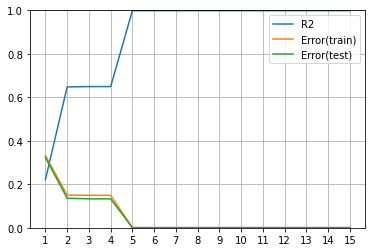

In [105]:
q2_data=pd.read_csv("q2_data.csv")
test_size = 0.3
columns = ['R2', 'Error(train)', 'Error(test)', 'model']
results = []
degrees = range(1,16)
# try model = LinearRegression(), Lasso() and Ridge()
model = LinearRegression() 
#model=linear_model.Ridge(alpha=0.1,max_iter=10000)
#model = linear_model.Lasso(alpha=0.01,max_iter=10000) 
for d in degrees:
    results.append(fit_poly(degree=d, data=q2_data, model=model))
res = pd.DataFrame(results, index=degrees, columns=columns)
display(res)
res.plot()
plt.ylim((0,1))
plt.xticks(degrees)
plt.grid()

f(x)=  13.944644570684666
+ 16.150233800371456 * X^1
+ -64.46420135366411 * X^2
+ 88.61485475949736 * X^3
+ -49.99899308237356 * X^4
+ 9.997891666945343 * X^5
R2=0.9985115260541232
Error(train)=0.0006348986285034617
Error(test)=0.0007280924136923384


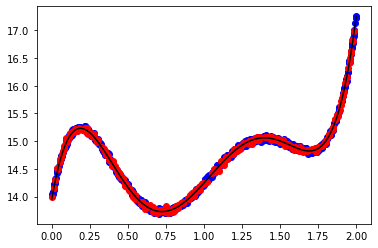

In [104]:
R2, Etrain, Etest, model = fit_poly(degree=5, data=q2_data, plot=True)

coefficient_length= range(len(model.coef_))
print('f(x)= ',model.intercept_,)
for i in coefficient_length:
        print('+',model.coef_[i],'*',f"X^{i+1}")

print(f'R2={R2}\nError(train)={Etrain}\nError(test)={Etest}')

### b (20 pts) 
    Use the regression equation given in part (a) to find y value for x=1. 
    Assume this is the correct value returned by the population function that is approximated by f(x) found in part (a). 
    Then, apply the following procedure to fit several models with degree 1..0 by taking a sample of size 20 from the given dataset and predict y at x = 1:

for d in range(1,11):
    add polynomial features up to degree d
    pred = []
    for i in range(1000):
        take a sample of size 20 rows from the dataset with added polynomial features
        fit a linear regression model (do not apply train/test split)
        predict the value of y at x = 1 
        append y to pred list
    find and print d, and the mean and the standard deviation of pred list (i.e., 1000 predictions for degree=d)

Compare the mean prediction found with the value returned by the function found in part (a) and standard deviations of the predictions made for different degrees. Comment on the obtained results.


**Answer**
When we calculate the correct y value regarding to regression equation founded in part (a) with "x=1" we find 14.244430361461163

After that several models are created according to given degree range and prediction of "y" wrt "x=1" is calculated. We can see from the results table y takes nearly values of "14.286522009933638" with std nearly "2.3092638912203257e-15"

We can see that our model in part(a) and new results are accurate as expected.

In [171]:
X=1
correct_y = 13.944644570684666+ 16.150233800371456*(pow(X,1))+ (-64.46420135366411)*(pow(X,2))+ 88.61485475949736*(pow(X,3))+ (-49.99899308237356)*(pow(X,4))+ 9.997891666945343*(pow(X,5))
print(correct_y)

14.244430361461163


In [169]:
## This function generates polynomial and interaction features and add the data then fits polynomial regression
def fit_poly_b(degree, data, model=LinearRegression(),plot=False):
    base_x_value=pd.DataFrame(data={'x': [1]})
    predictions = []
    poly = PolynomialFeatures(degree=degree, include_bias=False) 
    pf = poly.fit_transform(data[['x']])  ## creates polynomial features with given degree
    pf_base_x=poly.fit_transform(base_x_value)  ## creates polynomial features with given degree for X=1
    X = pd.DataFrame(pf, columns=poly.get_feature_names())
    base_x_df = pd.DataFrame(pf_base_x, columns=poly.get_feature_names())
    X['y'] = data['y']
    for i in range(1000):
        process_data = X.sample(n=20, random_state=2532810)
        X_sampled = process_data.drop('y', axis=1)
        Y_sampled = process_data['y']
        model.fit(X_sampled,Y_sampled)
        predictions.append(model.predict(base_x_df))
    return np.mean(predictions),np.std(predictions)

In [173]:
q2_data=pd.read_csv("q2_data.csv")
columns = ['means', 'stds']
results = []
degrees = range(1,11)
for d in degrees:
    results.append(fit_poly_b(d, q2_data, model=LinearRegression(),plot=False))    
res = pd.DataFrame(results, index=degrees, columns=columns)
display(res)


,means,stds
1,14.726572,5.329071e-15
2,14.291205,0.000000e+00
3,14.294967,1.776357e-15
4,14.074431,5.329071e-15
5,14.259684,1.776357e-15
6,14.257820,1.776357e-15
7,14.252338,1.776357e-15
8,14.244928,3.552714e-15
9,14.240940,0.000000e+00
10,14.222335,1.776357e-15


In [174]:
print(np.mean(res['means']))
print(np.mean(res['stds']))

14.286522009933638
2.3092638912203257e-15
